In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace = True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 11)

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df = pd.get_dummies(df,columns = ['Geography','Gender'],drop_first = True)

In [11]:
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [12]:
df.shape

(10000, 12)

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


In [15]:
X = df.drop(columns = ['Exited'])

In [16]:
y = df['Exited'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [19]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
650,629,49,4,0.00,2,1,1,196335.48,False,False,False
9960,795,33,9,104552.72,1,1,1,120853.83,True,False,False
977,520,38,4,0.00,2,1,0,56388.63,False,False,False
2111,642,25,7,0.00,2,1,0,102083.78,False,False,True
9557,655,67,6,148363.38,1,1,1,186995.17,True,False,True


In [20]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)


In [21]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [22]:
model = Sequential()

In [23]:
df.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False


In [24]:
df.shape

(10000, 12)

In [25]:
model.add(Dense(11,activation = 'sigmoid',input_dim = 11))
model.add(Dense(11,activation = 'sigmoid'))
model.add(Dense(1,activation = 'sigmoid'))   

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction

In [28]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'Adam' ,metrics = ['accuracy'])

In [29]:
history = model.fit(X_train,y_train,batch_size = 50, epochs =75, verbose=1, validation_split=0.2)

Epoch 1/75
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8004 - loss: 0.5163 - val_accuracy: 0.7956 - val_loss: 0.5051
Epoch 2/75
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7873 - loss: 0.5154 - val_accuracy: 0.7956 - val_loss: 0.5039
Epoch 3/75
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7983 - loss: 0.4981 - val_accuracy: 0.7956 - val_loss: 0.5028
Epoch 4/75
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.4999 - val_accuracy: 0.7956 - val_loss: 0.5025
Epoch 5/75
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7886 - loss: 0.5093 - val_accuracy: 0.7956 - val_loss: 0.5024
Epoch 6/75
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4994 - val_accuracy: 0.7956 - val_loss: 0.5020
Epoch 7/75
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4989 - val_accuracy: 0.7956 - val_loss: 0.5019
Epoch 8/75
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7936 - loss: 0.5028 - val_accuracy: 0.

In [30]:
history.history

{'accuracy': [0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147

In [31]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [32]:
y_pred

array([[0.13805752],
       [0.13805752],
       [0.22841382],
       ...,
       [0.24093884],
       [0.22486363],
       [0.13805752]], dtype=float32)

In [33]:
y_pred = y_pred.argmax(axis=-1)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.793

In [35]:
import matplotlib.pyplot as plt

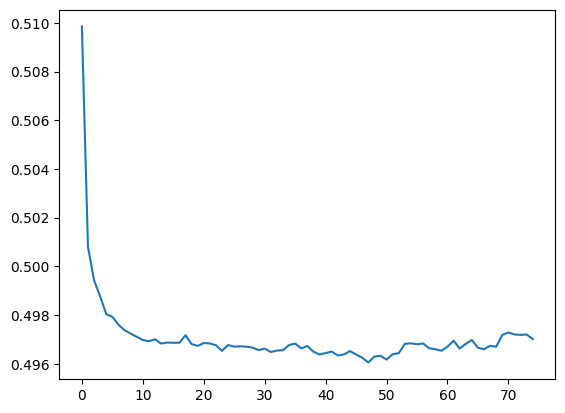

In [36]:
plt.plot(history.history['loss'])

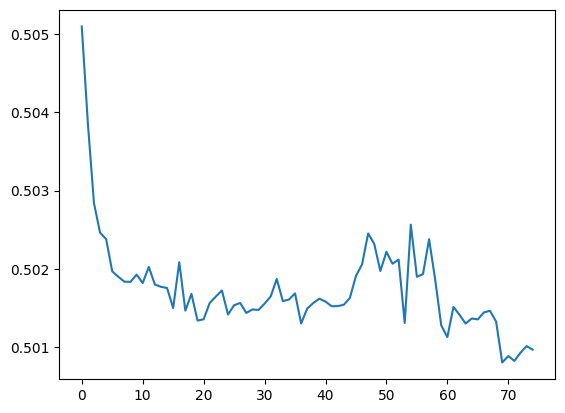

In [37]:
plt.plot(history.history['val_loss'])

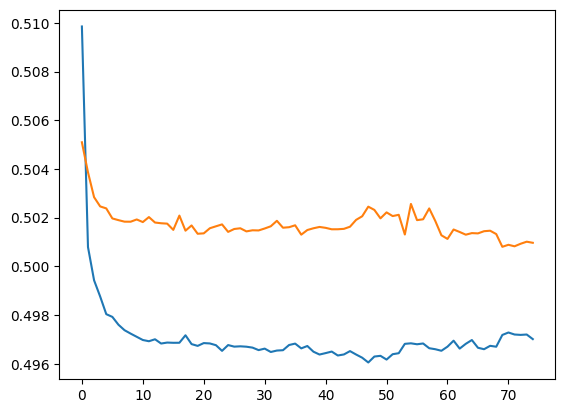

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

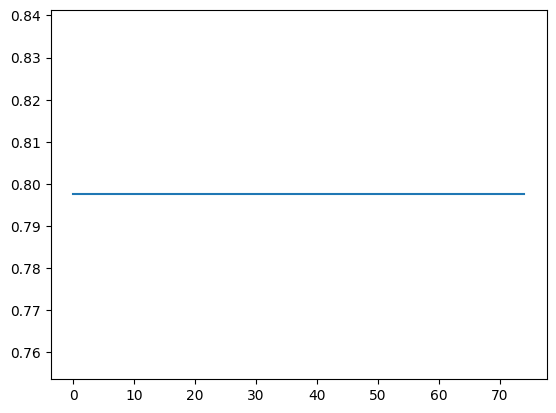

In [39]:
plt.plot(history.history['accuracy'])

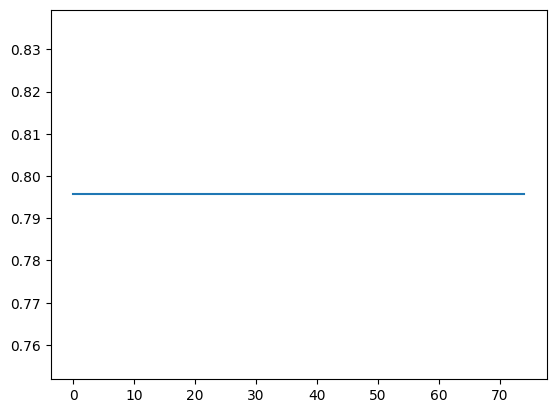

In [40]:
plt.plot(history.history['val_accuracy'])

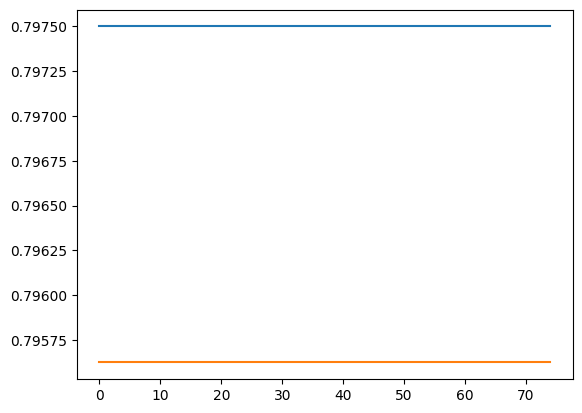

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

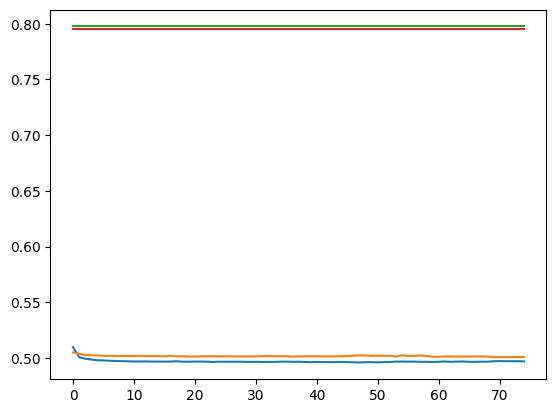

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])